# 資産レポート

In [1]:
import sys
sys.path.append('../')
%cd '..'

/home/tsu-nera/repo/bakuchi


In [2]:
import src.utils.asset as tool

%reload_ext autoreload
%autoreload 2

In [3]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

import japanize_matplotlib

In [4]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 4)

In [5]:
cc_df = tool.read_asset("coincheck")
lq_df = tool.read_asset("liquid")
total_df = tool.read_asset_total()

In [6]:
len(cc_df), len(lq_df), len(total_df)

(167, 167, 167)

In [7]:
cc_df.head(3)

,jpy,btc,btc_as_jpy,total_jpy
timestamp,,,,
2020-03-18 15:00:01,5259,0.011008,6276,11535
2020-03-18 16:00:01,5259,0.011008,6257,11516
2020-03-18 17:00:01,5259,0.011008,6156,11415


In [8]:
total_df["datetime"] = total_df.index
total_df["year"] = total_df.index.year
total_df["date"] = total_df.index.strftime('%Y-%m-%d')
total_df["year_and_month"] = total_df.index.strftime('%Y-%m')
total_df["year_and_wom"] = total_df.index.strftime('%Y-W%W')

## 日次レポート

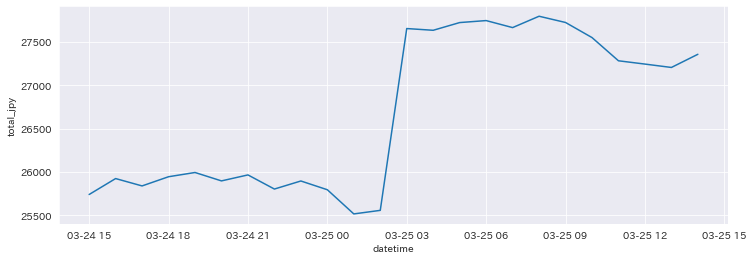

In [9]:
df_day = total_df.tail(24)
sns.lineplot(data=df_day, x='datetime', y="total_jpy")

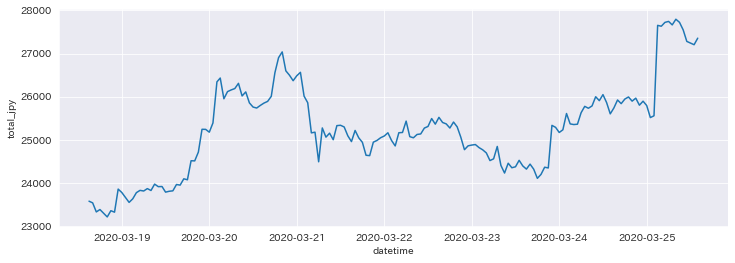

In [10]:
df_recent = total_df.tail(24*10)
sns.lineplot(data=df_recent, x='datetime', y="total_jpy")

In [11]:
groupby = df_recent.groupby("date")
df_days = pd.DataFrame()
df_days["total_jpy"] = round(groupby["total_jpy"].mean(), 3)

In [12]:
df_days.tail(10)

,total_jpy
date,
2020-03-18,23428.111
2020-03-19,24067.522
2020-03-20,26127.000
2020-03-21,25237.208
2020-03-22,25192.667
2020-03-23,24558.250
2020-03-24,25725.792
2020-03-25,27163.000


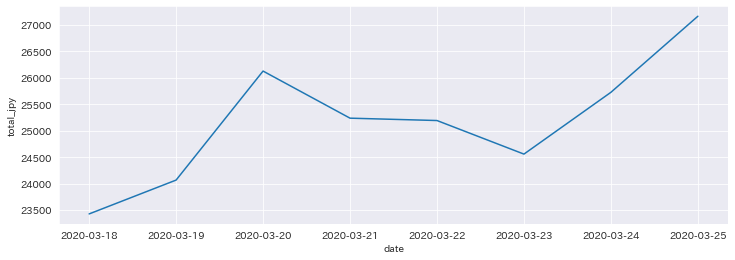

In [13]:
df_days["date"] = df_days.index
sns.lineplot(data=df_days, x='date', y='total_jpy')

## 週次レポート

In [14]:
groupby = total_df.groupby('year_and_wom')
df_by_week = pd.DataFrame()
df_by_week["total_jpy"] = round(groupby["total_jpy"].mean(), 3)

In [15]:
df_by_week

,total_jpy
year_and_wom,
2020-W11,25017.029
2020-W12,25623.206


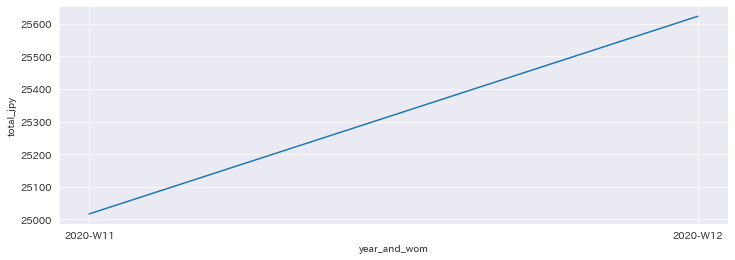

In [16]:
df_by_week["year_and_wom"] = df_by_week.index
sns.lineplot(data=df_by_week, x='year_and_wom', y='total_jpy')

## 月次レポート

In [17]:
groupby = total_df.groupby('year_and_month')
df_by_month = pd.DataFrame()
df_by_month["total_jpy"] = round(groupby["total_jpy"].mean(), 3)

In [18]:
df_by_month

,total_jpy
year_and_month,
2020-03,25245.707


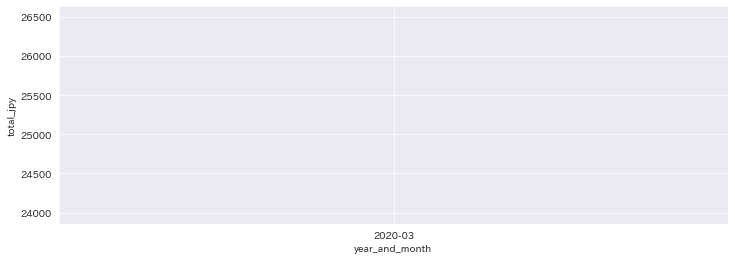

In [19]:
df_by_month["year_and_month"] = df_by_month.index
sns.lineplot(data=df_by_month, x='year_and_month', y='total_jpy')